set  $s = a^2$

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
epoch      0  total error      0.12449   avg weight        1.0208
epoch      1  total error      0.11468   avg weight        1.0193
('train error: 15.00%', ',  test error:  5.00%')
epoch      2  total error      0.11436   avg weight        1.0213
epoch      3  total error      0.11029   avg weight        1.0305
('train error: 23.75%', ',  test error: 10.00%')
epoch      4  total error       0.1132   avg weight        1.0253
epoch      5  total error      0.10798   avg weight        1.0385
('train error:  0.00%', ',  test error: 22.50%')
epoch      6  total error      0.10786   avg weight        1.0517
epoch      7  total error      0.10763   avg weight        1.0569
('train error:  0.00%', ',  test error:  0.00%')
epoch      8  total error      0.10487   avg weight        1.0719
epoch      9  total error      0.10343   avg weight        1.0924
('train error:  0.00%', ',  test error:  0.00%')
epoch     10  total error      

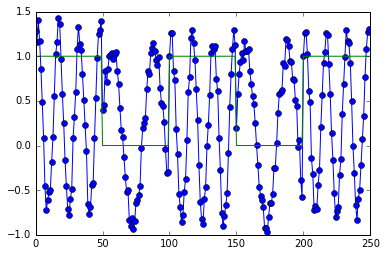

In [1]:
#from __future__ import print_function
# %plylab
# %matplotlib inline
%reset
#%pylab inline
%matplotlib inline
#!/usr/bin/env python
# Example script for recurrent network usage in PyBrain.
__author__ = "Martin Felder"
__version__ = '$Id$'

from pylab import plot, hold, show
from scipy import sin, rand, arange
from pybrain.datasets            import SequenceClassificationDataSet
from pybrain.structure.modules   import LSTMLayer, SoftmaxLayer
from pybrain.supervised          import RPropMinusTrainer
from pybrain.tools.validation    import testOnSequenceData
from pybrain.tools.shortcuts     import buildNetwork

#在C:\Users\xwei\Desktop\pybrain-pybrain-0.3.1-0-g87c7ac3\pybrain-pybrain-87c7ac3\examples\supervised\neuralnets+svm\datasets 
#文件下有一个datagenerator.py 文件
from datasets import generateNoisySines

# create training and test data
trndata = generateNoisySines(50, 40)
trndata._convertToOneOfMany( bounds=[0.,1.] )
tstdata = generateNoisySines(50, 20)
tstdata._convertToOneOfMany( bounds=[0.,1.] )

# construct LSTM network - note the missing output bias
rnn = buildNetwork( trndata.indim, 5, trndata.outdim, hiddenclass=LSTMLayer, outclass=SoftmaxLayer, outputbias=False, recurrent=True)

# define a training method
trainer = RPropMinusTrainer( rnn, dataset=trndata, verbose=True )
# instead, you may also try
##trainer = BackpropTrainer( rnn, dataset=trndata, verbose=True, momentum=0.9, learningrate=0.00001 )

# carry out the training
for i in range(500): #100
    trainer.trainEpochs( 2 )
    trnresult = 100. * (1.0-testOnSequenceData(rnn, trndata))
    tstresult = 100. * (1.0-testOnSequenceData(rnn, tstdata))
    print("train error: %5.2f%%" % trnresult, ",  test error: %5.2f%%" % tstresult)

# just for reference, plot the first 5 timeseries
plot(trndata['input'][0:250,:],'-o')
hold(True)
plot(trndata['target'][0:250,0])
show()

epoch      0  total error      0.13866   avg weight       0.97094
epoch      1  total error      0.12437   avg weight       0.97993
train error:  6.25% ,  test error:  0.00%
epoch      2  total error      0.12309   avg weight       0.97694
epoch      3  total error      0.12081   avg weight       0.98135
train error: 18.75% ,  test error: 20.00%
epoch      4  total error      0.11937   avg weight       0.98895
epoch      5  total error      0.11707   avg weight             1
train error: 17.50% ,  test error: 20.00%
epoch      6  total error      0.11335   avg weight        1.0299
epoch      7  total error      0.10427   avg weight        1.0556
train error:  0.00% ,  test error:  0.00%
epoch      8  total error     0.091245   avg weight        1.0967
epoch      9  total error      0.10433   avg weight        1.1406
train error: 48.75% ,  test error: 47.50%


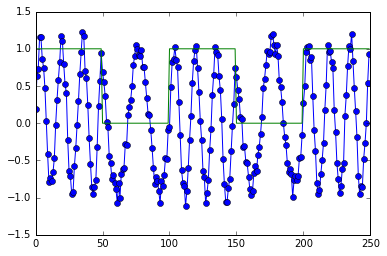

In [4]:
#!/usr/bin/env python
# Example script for recurrent network usage in PyBrain.
__author__ = "Martin Felder"
__version__ = '$Id$'

# %pylab inline  #在网页中输入%pylab inline，将自动导入SciPy、NumPy、Matplotlib模块
%matplotlib inline

from pylab import plot, hold, show
from scipy import sin, rand, arange
from pybrain.datasets            import SequenceClassificationDataSet
from pybrain.structure.modules   import LSTMLayer, SoftmaxLayer
from pybrain.supervised          import RPropMinusTrainer
from pybrain.tools.validation    import testOnSequenceData
from pybrain.tools.shortcuts     import buildNetwork

#在C:\Users\xwei\Desktop\pybrain-pybrain-0.3.1-0-g87c7ac3\pybrain-pybrain-87c7ac3\examples\supervised\neuralnets+svm\datasets 
#文件下有一个datagenerator.py 文件 , ** 将此文件夹datasets 放到运行文件目录下
from datasets import generateNoisySines

# create training and test data
trndata = generateNoisySines(50, 40)
trndata._convertToOneOfMany( bounds=[0.,1.] )
tstdata = generateNoisySines(50, 20)
tstdata._convertToOneOfMany( bounds=[0.,1.] )

# construct LSTM network - note the missing output bias
rnn = buildNetwork( trndata.indim, 5, trndata.outdim, hiddenclass=LSTMLayer, outclass=SoftmaxLayer, outputbias=False, recurrent=True)

# define a training method
trainer = RPropMinusTrainer( rnn, dataset=trndata, verbose=True )
# instead, you may also try
##trainer = BackpropTrainer( rnn, dataset=trndata, verbose=True, momentum=0.9, learningrate=0.00001 )

# carry out the training
for i in xrange(5): # 100
    trainer.trainEpochs( 2 )
    trnresult = 100. * (1.0-testOnSequenceData(rnn, trndata))
    tstresult = 100. * (1.0-testOnSequenceData(rnn, tstdata))
    print "train error: %5.2f%%" % trnresult, ",  test error: %5.2f%%" % tstresult

# just for reference, plot the first 5 timeseries
plot(trndata['input'][0:250,:],'-o')
hold(True)
plot(trndata['target'][0:250,0])
show()

In [1]:
data = [1] * 3 + [2] * 3
data *= 3
print(data)

[1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2]


In [2]:
from pybrain.datasets import SequentialDataSet
from itertools import cycle

ds = SequentialDataSet(1, 1)
for sample, next_sample in zip(data, cycle(data[1:])):
    ds.addSample(sample, next_sample)

In [3]:
print ds

sequence_index: dim(2L, 1L)
[[ 0.]]

input: dim(30L, 1L)
[[ 1.]
 [ 1.]
 [ 1.]
 [ 2.]
 [ 2.]
 [ 2.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 2.]
 [ 2.]
 [ 2.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 2.]
 [ 2.]
 [ 2.]]

target: dim(30L, 1L)
[[ 1.]
 [ 1.]
 [ 2.]
 [ 2.]
 [ 2.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 2.]
 [ 2.]
 [ 2.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 2.]
 [ 2.]
 [ 2.]
 [ 1.]]




In [5]:
from pybrain.tools.shortcuts import buildNetwork
from pybrain.structure.modules import LSTMLayer

net = buildNetwork(1, 5, 1, hiddenclass=LSTMLayer, outputbias=False, recurrent=True)

In [6]:
from pybrain.supervised import RPropMinusTrainer
from sys import stdout

trainer = RPropMinusTrainer(net, dataset=ds)
train_errors = [] # save errors for plotting later
EPOCHS_PER_CYCLE = 5
CYCLES = 100
EPOCHS = EPOCHS_PER_CYCLE * CYCLES
for i in xrange(CYCLES):
    trainer.trainEpochs(EPOCHS_PER_CYCLE)
    train_errors.append(trainer.testOnData())
    epoch = (i+1) * EPOCHS_PER_CYCLE
    print("\r epoch {}/{}".format(epoch, EPOCHS), end="")
    stdout.flush()

print()
print("final error =", train_errors[-1])

 epoch 500/500
final error = 3.47299063616e-07


In [7]:
import matplotlib.pyplot as plt

plt.plot(range(0, EPOCHS, EPOCHS_PER_CYCLE), train_errors)
plt.xlabel('epoch')
plt.ylabel('error')
plt.show()

In [8]:
for sample, target in ds.getSequenceIterator(0):
    print("               sample = %4.1f" % sample)
    print("predicted next sample = %4.1f" % net.activate(sample))
    print("   actual next sample = %4.1f" % target)
    print()

               sample =  1.0
predicted next sample =  1.0
   actual next sample =  1.0

               sample =  1.0
predicted next sample =  1.0
   actual next sample =  1.0

               sample =  1.0
predicted next sample =  2.0
   actual next sample =  2.0

               sample =  2.0
predicted next sample =  2.0
   actual next sample =  2.0

               sample =  2.0
predicted next sample =  2.0
   actual next sample =  2.0

               sample =  2.0
predicted next sample =  1.0
   actual next sample =  1.0

               sample =  1.0
predicted next sample =  1.0
   actual next sample =  1.0

               sample =  1.0
predicted next sample =  1.0
   actual next sample =  1.0

               sample =  1.0
predicted next sample =  2.0
   actual next sample =  2.0

               sample =  2.0
predicted next sample =  2.0
   actual next sample =  2.0

               sample =  2.0
predicted next sample =  2.0
   actual next sample =  2.0

               sample =  2.0
pre